## Applied Machine Learning, Module 1:  A simple classification task

### Import Required Modules and load data file

In [70]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('readonly/fruit_data_with_colors.txt')


In [71]:
#input data, cada renglon es una fruta
# tiene 4 features y hay que clasificarle el nombre de la fruta
#color cercano a 1 son rojo, y en 0.5 son verde

fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [72]:
# create a mapping from fruit label value to fruit name
# in order to change names to numbers
#to make results easier to interpret

# We create a relation between fruit label and fruit name

print(list(zip(fruits.fruit_label.unique(),
                             fruits.fruit_name.unique())))

# and we make it into a dictionary.
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(),
                             fruits.fruit_name.unique()))  


lookup_fruit_name

#queremos un programa que dado la masa, altura, color,
# etc nos diga que fruta es

[(1, 'apple'), (2, 'mandarin'), (3, 'orange'), (4, 'lemon')]


{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.


### Examining the data

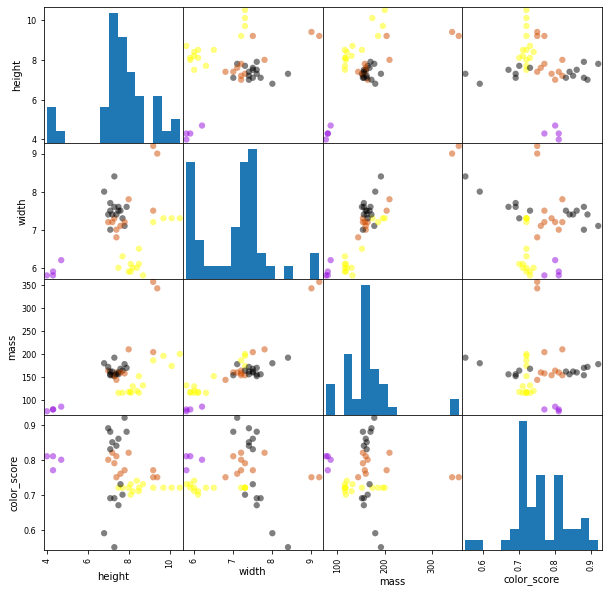

In [73]:
# plotting a scatter matrix
%matplotlib inline
from matplotlib import cm

# X guarda todos los features de las frutas
X = fruits[['height', 'width', 'mass', 'color_score']]

#y es la lista de los labels correspondientes a X
# fruit label is a number 1,2,3,4. not the name of the fruit
y = fruits['fruit_label']



# train_test_split es una funcion que  toma unas features X y unas respuestas y
# y nos lo divide al azar en un grupo de train de preguntas y respuestas
# y un test set de preguntas y respuestas.

# el random state es como un seed.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# automaticamente mete 75% en el train y 25 en el test. 


# Primero examinamos la data parasaber si tenemos que limpiarla o algo.
cmap = cm.get_cmap('gnuplot')
# no s'e qu'e es cmap, creo que es para usar gnuplot en vez del plot normal
print(cmap)


# vamos a hacer una scatter_matrix del training set

#the first enty is the data frame we wish to plot
# c is the color, we give a color depending on the value of y_train
# y_train is a list of numbers 1,2,3,4 because of what we did with the dict
# marker is the thing we draw. 
#s is the size of points. 
#hist_kwds is the kewywords we will pass to histograms. In this case, the bins
#figsize is the size in inches

scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o',
                            s=40, hist_kwds={'bins':15}, figsize=(10,10),
                                     cmap=cmap, label='a')



# The scatter plot plots each feature against the other. 
# colored according to the fruit
# and also histograms of each varaible.

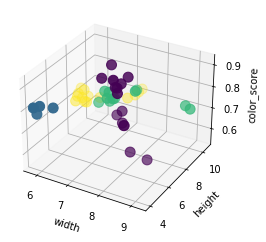

In [74]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

# plot a figure
fig = plt.figure()
# in 3d
ax = fig.add_subplot(111, projection = '3d')

#we make a scatter plot, with width, height and color score
#with the color given by y_train
ax.scatter(X_train['width'], X_train['height'],
           X_train['color_score'], c = y_train, marker = 'o', s=100)

#set labels
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

# KNN clasifier

When given a new istance x_test to be classified, the program will look at k elements from the X_train set. Then, it will see their classifications y_{train} and it averages them to calculate the classification of x. <br>
It may use a simple mayority vote or something. <br>

For this we need a distance metric (to select the nearest neighbor, usually the Euclidean, but in general it may be minkowsky) and we need a number k. <br>
We can use a weight function to give some weight to some objects over others (maybe the closests objects are valued more). 

### Create Train test Split

In [75]:
# For this example, we use only the mass, 
# width, and height features of each fruit instance

X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
# random state is the seed of random numbers
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object


In [76]:
from sklearn.neighbors import KNeighborsClassifier

#Classifier with 5 neighbors
# we create the classifier object

knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data


In [77]:
# we train the classifier
# using normal euclidean metric
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Estimate the accuracy of the classifier on future data, using the test data

In [78]:
# we apply the data on all unseen data and score how good it is 
#( the fracition of unseen elements that are correctly clasified )

knn.score(X_test, y_test)

0.5333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects


In [79]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
print(fruit_prediction)
lookup_fruit_name[fruit_prediction[0]]

[2]


'mandarin'

In [80]:
# second example: a larger, elongated 
# fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

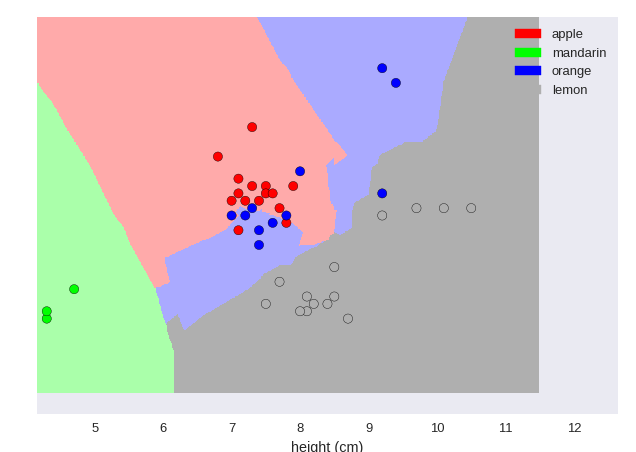

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?


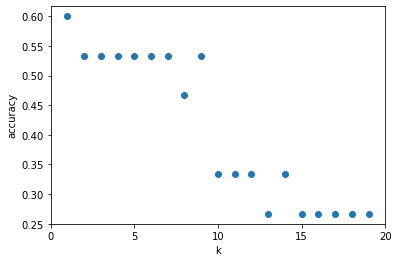

In [87]:
k_range = range(1,20)
scores = []

for k in k_range:
    #create the KNN object
    knn = KNeighborsClassifier(n_neighbors = k)
    #fit it
    knn.fit(X_train, y_train)
    #append the score
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

#keep in mind this is only for this set of information. 

### How sensitive is k-NN classification accuracy to the train/test split proportion?


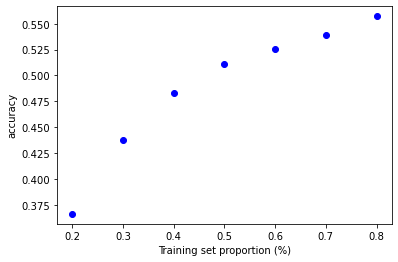

In [88]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

# # Assignment 1 - Introduction to Machine Learning
For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

#print(cancer.DESCR) # Print the data set description

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [29]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

### Question 0 (Example)

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [30]:
# You should write your whole answer within the function provided. The autograder will call
# this function and compare the return value against the correct solution value
def answer_zero():
    # This function returns the number of features of the breast cancer dataset, which is an integer. 
    # The assignment question description will tell you the general format the autograder is expecting
    return len(cancer['feature_names'])

# You can examine what your function returns by calling it in the cell. If you have questions
# about the assignment formats, check out the discussion forums for any FAQs
answer_zero() 

30

### Question 1

Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a DataFrame does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame. 



Convert the sklearn.dataset `cancer` to a DataFrame. 

*This function should return a `(569, 31)` DataFrame with * 

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']

*and index = *

    RangeIndex(start=0, stop=569, step=1)

In [31]:
def answer_one():
    
    
    # Your code here
    
    # Target is not exists in current feature names, so append it to columns    
    columns = np.append(cancer.feature_names, 'target');   
    print("Features Column Size: " + str(np.size(columns)))
    
    # Create a range index object for matrice
    index = pd.RangeIndex(start=0, stop=569, step=1);
    
    # Append target data to current data
    data = np.column_stack((cancer.data, cancer.target))
    print("Data Column Size: " + str(np.size(data) / 569))
    
    # Create dataframe with keywords
    df = pd.DataFrame(data=data, index=index, columns=columns)
    
    return df # Return your answer





answer_one()

Features Column Size: 31
Data Column Size: 31.0


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


### Question 2
What is the class distribution? (i.e. how many instances of `malignant` (encoded 0) and how many `benign` (encoded 1)?)

*This function should return a Series named `target` of length 2 with integer values and index =* `['malignant', 'benign']`

In [32]:
def answer_two():
    cancerdf = answer_one()
    
    # Your code here
    index = ['malignant', 'benign']
    
    # Select data where target equals 1.0 and 0.0 for each malignant and bening values
    malignants = np.where(cancerdf['target'] == 0.0);
    benings = np.where(cancerdf['target'] == 1.0);
    
    # Get sizes and build a matrice
    data = [np.size(malignants), np.size(benings)]
    print(data)
    
    # Construct a series object
    series = pd.Series(data, index=index)
    
    return series # Return your answer


answer_two()

Features Column Size: 31
Data Column Size: 31.0
[212, 357]


malignant    212
benign       357
dtype: int64

### Question 3
Split the DataFrame into `X` (the data) and `y` (the labels).

*This function should return a tuple of length 2:* `(X, y)`*, where* 
* `X`*, a pandas DataFrame, has shape* `(569, 30)`
* `y`*, a pandas Series, has shape* `(569,)`.

In [34]:
def answer_three():
    cancerdf = answer_one()
    
    # Your code here
    # Drop target column, axis=1 means drop column with given name, axis=0 means drop row.
    X = cancerdf.drop('target', axis=1)
    y = cancerdf.get('target')
    
    return X, y
answer_three()

Features Column Size: 31
Data Column Size: 31.0


(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

### Question 4
Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

**Set the random number generator state to 0 using `random_state=0` to make sure your results match the autograder!**

*This function should return a tuple of length 4:* `(X_train, X_test, y_train, y_test)`*, where* 
* `X_train` *has shape* `(426, 30)`
* `X_test` *has shape* `(143, 30)`
* `y_train` *has shape* `(426,)`
* `y_test` *has shape* `(143,)`

In [36]:
from sklearn.model_selection import train_test_split

def answer_four():
    X, y = answer_three()
    
    # Your code here
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    return X_train, X_test, y_train, y_test

answer_four()

Features Column Size: 31
Data Column Size: 31.0


(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 293       11.850         17.46           75.54      432.7          0.08372   
 332       11.220         19.86           71.94      387.3          0.10540   
 565       20.130         28.25          131.20     1261.0          0.09780   
 278       13.590         17.84           86.24      572.3          0.07948   
 489       16.690         20.20          107.10      857.6          0.07497   
 ..           ...           ...             ...        ...              ...   
 277       18.810         19.98          120.90     1102.0          0.08923   
 9         12.460         24.04           83.97      475.9          0.11860   
 359        9.436         18.32           59.82      278.6          0.10090   
 192        9.720         18.22           60.73      288.1          0.06950   
 559       11.510         23.93           74.52      403.5          0.09261   
 
      mean compactness  mean concavity  mean conca

### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train` and using one nearest neighbor (`n_neighbors = 1`).

*This function should return a * `sklearn.neighbors.classification.KNeighborsClassifier`.

In [40]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    X_train, X_test, y_train, y_test = answer_four()
    
    # Your code here
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train, y_train)
    knn.score(X_test, y_test)
    
    return knn # Return your answer

answer_five()
print(knn.score(X_test, y_test))

Features Column Size: 31
Data Column Size: 31.0
0.26666666666666666


### Question 6
Using your knn classifier, predict the class label using the mean value for each feature.

Hint: You can use `cancerdf.mean()[:-1].values.reshape(1, -1)` which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the precict method of KNeighborsClassifier).

*This function should return a numpy array either `array([ 0.])` or `array([ 1.])`*

In [42]:
def answer_six():
    cancerdf = answer_one()
    means = cancerdf.mean()[:-1].values.reshape(1, -1)
    
    # Your code here
    knn = answer_five()
    
    return knn.predict(means) # Return your answer
answer_six()

Features Column Size: 31
Data Column Size: 31.0
Features Column Size: 31
Data Column Size: 31.0


array([1.])

### Question 7
Using your knn classifier, predict the class labels for the test set `X_test`.

*This function should return a numpy array with shape `(143,)` and values either `0.0` or `1.0`.*

In [43]:
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    
    # Your code here
    test_prediction = knn.predict(X_test)
    
    return test_prediction # Return your answer
answer_seven()

Features Column Size: 31
Data Column Size: 31.0
Features Column Size: 31
Data Column Size: 31.0


array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0.])

 ### Question 8
Find the score (mean accuracy) of your knn classifier using `X_test` and `y_test`.

 *This function should return a float between 0 and 1*

In [45]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    
    # Your code here
    score = knn.score(X_test, y_test)
    print("Accuaracy: " + str(score))
    
    prediction = answer_six()
    print("Going to be cancer: " + str())
    
    return score # Return your answer


# In[19]:

answer_eight()

Features Column Size: 31
Data Column Size: 31.0
Features Column Size: 31
Data Column Size: 31.0
Accuaracy: 0.916083916083916
Features Column Size: 31
Data Column Size: 31.0
Features Column Size: 31
Data Column Size: 31.0
Going to be cancer: 


0.916083916083916

### Optional plot

Try using the plotting function below to visualize the differet predicition scores between training and test sets, as well as malignant and benign cells.

Features Column Size: 31
Data Column Size: 31.0
Features Column Size: 31
Data Column Size: 31.0


<IPython.core.display.Javascript object>


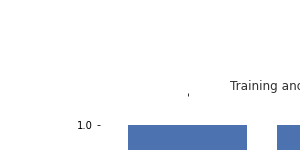

In [47]:
%matplotlib inline

def accuracy_plot():
    import matplotlib.pyplot as plt

    get_ipython().magic('matplotlib notebook')

    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = answer_five()

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)


# In[97]:

# Uncomment the plotting function to see the visualization, 
# Comment out the plotting function when submitting your notebook for grading

accuracy_plot() 


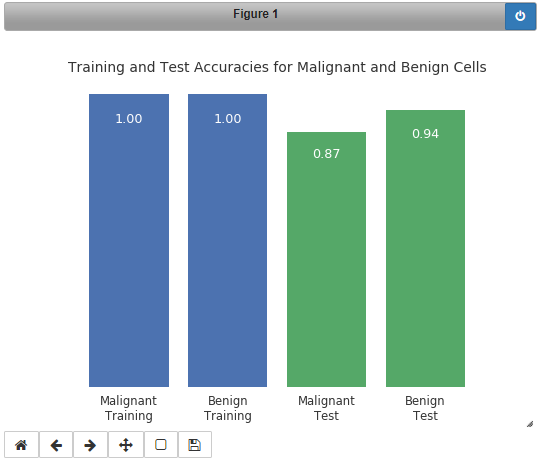